In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

combined_top_df = pd.DataFrame()

for year in range(2013, 2023+1):
    file_path = '상품_양파_{}년_일별.xlsx'.format(year)
    df = pd.read_excel(file_path)

    for i in range(len(df.columns.values[1:])):
        if df.columns.values[1:][i].year == 2023:
            df.columns.values[1:][i] = df.columns.values[1:][i].replace(year=year)
        

    df = df.transpose()
    df.rename(columns=df.iloc[0],inplace=True)
    df = df.drop(df.index[0])

    
    combined_top_df = pd.concat([combined_top_df, df])
    combined_top_df['품질']='상품'
combined_top_df = combined_top_df.reset_index()
combined_top_df = combined_top_df.rename(columns={'index': 'date_time'})


In [2]:
combined_top_df 

,date_time,평균,평년,서울,부산,대구,광주,대전,품질
0,2013-01-02,20100,11419,21000,19500,19500,19500,21000,상품
1,2013-01-03,20100,11475,21000,19500,19500,19500,21000,상품
2,2013-01-04,20100,11510,21000,19500,19500,19500,21000,상품
3,2013-01-07,20400,11650,22500,19500,19500,19500,21000,상품
4,2013-01-08,20700,11643,24000,19500,19500,19500,21000,상품
...,...,...,...,...,...,...,...,...,...
2535,2023-05-11,19940,11910,19000,20500,19800,20300,20100,상품
2536,2023-05-12,19640,11838,18500,20500,19800,19300,20100,상품
2537,2023-05-15,18260,11388,18500,18700,18100,18300,17700,상품
2538,2023-05-16,18260,11287,18500,18700,18100,18300,17700,상품


In [3]:
import pandas as pd

combined_mid_df = pd.DataFrame()

for year in range(2013, 2023+1):
    file_path = '중품_양파_{}년_일별.xlsx'.format(year)
    df = pd.read_excel(file_path)

    for i in range(len(df.columns.values[1:])):
        if df.columns.values[1:][i].year == 2023:
            df.columns.values[1:][i] = df.columns.values[1:][i].replace(year=year)

    df = df.transpose()
    df.rename(columns=df.iloc[0],inplace=True)
    df = df.drop(df.index[0])
    
    combined_mid_df = pd.concat([combined_mid_df, df])

    combined_mid_df['품질']='중품'

combined_mid_df = combined_mid_df.reset_index()
combined_mid_df = combined_mid_df.rename(columns={'index': 'date_time'})
# 2016-02-29 date_time으로 안읽혀서 2016-02-28로 대체

In [4]:
combined_mid_df

,date_time,평균,평년,서울,부산,대구,광주,대전,품질
0,2013-01-02,18600,9680,19500,18000,18000,18000,19500,중품
1,2013-01-03,18600,9733,19500,18000,18000,18000,19500,중품
2,2013-01-04,18600,9800,19500,18000,18000,18000,19500,중품
3,2013-01-07,18900,9940,21000,18000,18000,18000,19500,중품
4,2013-01-08,19200,9938,22500,18000,18000,18000,19500,중품
...,...,...,...,...,...,...,...,...,...
2535,2023-05-11,16960,9297,17000,17500,16900,16300,17100,중품
2536,2023-05-12,16660,9184,16500,17500,16900,15300,17100,중품
2537,2023-05-15,15420,8826,16500,15700,15900,14300,14700,중품
2538,2023-05-16,15420,8715,16500,15700,15900,14300,14700,중품


In [5]:
onion_df = pd.DataFrame()


onion_df = pd.concat([combined_top_df, combined_mid_df])

onion_df.sort_values(by=['date_time'], axis=0)
onion_df['품종']='양파'

onion_df

,date_time,평균,평년,서울,부산,대구,광주,대전,품질,품종
0,2013-01-02,20100,11419,21000,19500,19500,19500,21000,상품,양파
1,2013-01-03,20100,11475,21000,19500,19500,19500,21000,상품,양파
2,2013-01-04,20100,11510,21000,19500,19500,19500,21000,상품,양파
3,2013-01-07,20400,11650,22500,19500,19500,19500,21000,상품,양파
4,2013-01-08,20700,11643,24000,19500,19500,19500,21000,상품,양파
...,...,...,...,...,...,...,...,...,...,...
2535,2023-05-11,16960,9297,17000,17500,16900,16300,17100,중품,양파
2536,2023-05-12,16660,9184,16500,17500,16900,15300,17100,중품,양파
2537,2023-05-15,15420,8826,16500,15700,15900,14300,14700,중품,양파
2538,2023-05-16,15420,8715,16500,15700,15900,14300,14700,중품,양파


In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

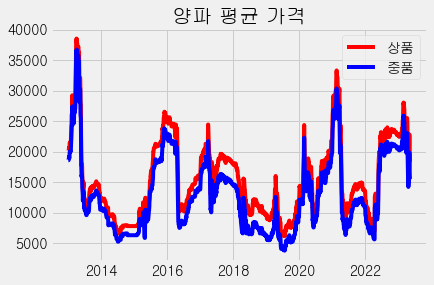

In [7]:
plt.plot(onion_df.loc[(onion_df["품질"] == "상품")]['date_time'], onion_df.loc[(onion_df["품질"] == "상품")]['평균'], 'r')
plt.plot(onion_df.loc[(onion_df["품질"] == "중품")]['date_time'], onion_df.loc[(onion_df["품질"] == "중품")]['평균'], 'b')

# 'bs',  'g^'
plt.title('양파 평균 가격')
plt.legend(['상품', '중품'])

plt.show()

In [8]:
onion_df.head()

,date_time,평균,평년,서울,부산,대구,광주,대전,품질,품종
0,2013-01-02,20100,11419,21000,19500,19500,19500,21000,상품,양파
1,2013-01-03,20100,11475,21000,19500,19500,19500,21000,상품,양파
2,2013-01-04,20100,11510,21000,19500,19500,19500,21000,상품,양파
3,2013-01-07,20400,11650,22500,19500,19500,19500,21000,상품,양파
4,2013-01-08,20700,11643,24000,19500,19500,19500,21000,상품,양파


In [9]:
onion_df['평균'] = pd.to_numeric(onion_df['평균'], errors='coerce')

new_df = onion_df.groupby('date_time')['평균'].mean().reset_index()
new_df = new_df.rename(columns={'평균': '상품중품평균가격'})
new_df

,date_time,상품중품평균가격
0,2013-01-02,19350.0
1,2013-01-03,19350.0
2,2013-01-04,19350.0
3,2013-01-07,19650.0
4,2013-01-08,19950.0
...,...,...
2535,2023-05-11,18450.0
2536,2023-05-12,18150.0
2537,2023-05-15,16840.0
2538,2023-05-16,16840.0


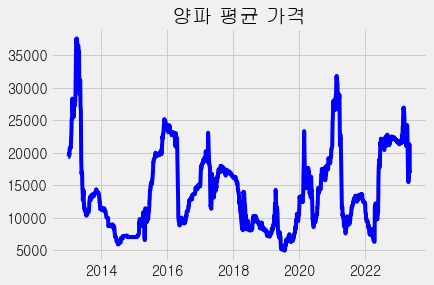

In [10]:
plt.plot(new_df['date_time'], new_df['상품중품평균가격'], 'b')

plt.title('양파 평균 가격')

plt.show()

In [11]:
# 날짜 범위가 '2013-01-01'에서 '2023-05-17'인 새 데이터 프레임 생성
new_date_range = pd.date_range(start='2013-01-01', end='2023-04-01', name='date_time')
new_withnull_df = pd.DataFrame({'date_time': new_date_range})

# 새 데이터 프레임을 기존 데이터 프레임과 병합
onion_df = pd.merge(new_withnull_df, new_df, on='date_time', how='left')

# date_time을 기준으로 데이터 프레임 정렬
onion_df = onion_df.sort_values('date_time').reset_index(drop=True)

In [12]:
onion_df.shape

(3743, 2)

In [13]:
onion_df.isnull().sum()

date_time       0
상품중품평균가격     1228
dtype: int64

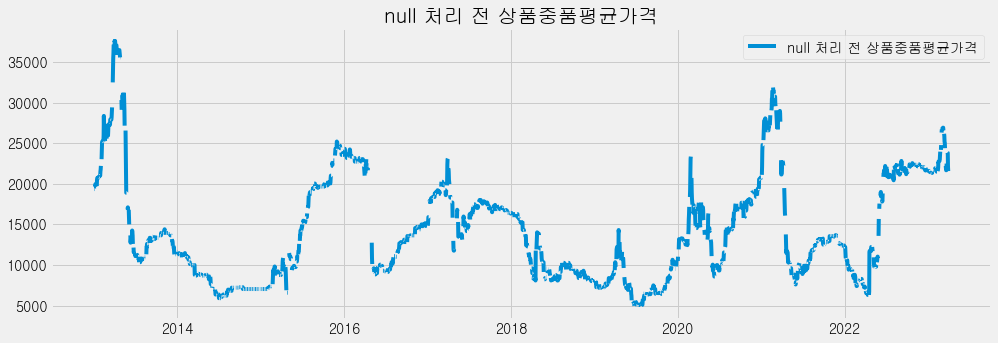

In [14]:
#### null 처리 전 상품중품평균가격 plot

# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15, 5))

# plot 표시
ax.plot(onion_df['date_time'], onion_df['상품중품평균가격'])

# 플롯 제목 및 범례 설정
ax.set_title('null 처리 전 상품중품평균가격')
ax.legend(['null 처리 전 상품중품평균가격'])

# 플롯 표시
plt.show()

In [15]:
new_onion_df = onion_df.interpolate()

In [16]:
new_onion_df.head(10)

,date_time,상품중품평균가격
0,2013-01-01,NaN
1,2013-01-02,19350.0
2,2013-01-03,19350.0
3,2013-01-04,19350.0
4,2013-01-05,19450.0
5,2013-01-06,19550.0
6,2013-01-07,19650.0
7,2013-01-08,19950.0
8,2013-01-09,19950.0
9,2013-01-10,19650.0


In [17]:
new_onion_df.isnull().sum()
#첫 행만 null

date_time    0
상품중품평균가격     1
dtype: int64

In [18]:
#첫 행은 다음 행 가격과 동일하게 처리
new_onion_df.loc[0,'상품중품평균가격'] = new_onion_df['상품중품평균가격'][1]
new_onion_df.head()

,date_time,상품중품평균가격
0,2013-01-01,19350.0
1,2013-01-02,19350.0
2,2013-01-03,19350.0
3,2013-01-04,19350.0
4,2013-01-05,19450.0


In [19]:
new_onion_df.isnull().sum()
# null 없음 확인

date_time    0
상품중품평균가격     0
dtype: int64

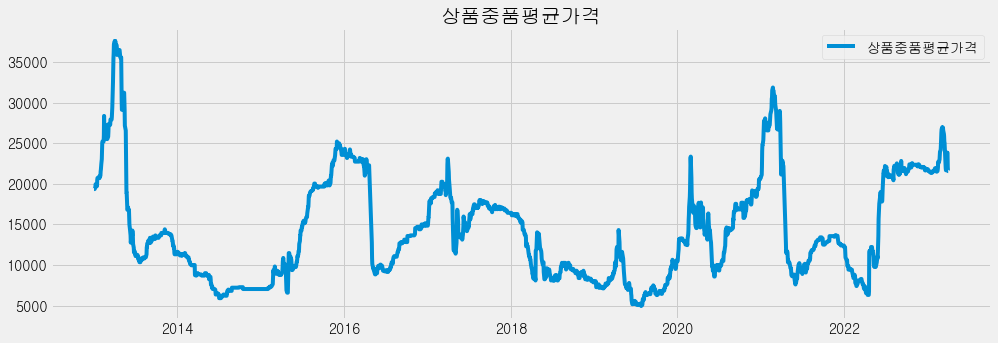

In [20]:
#### 최종 상품중품평균가격 plot

# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15, 5))

# plot 표시
ax.plot(new_onion_df['date_time'], new_onion_df['상품중품평균가격'])

# 플롯 제목 및 범례 설정
ax.set_title('상품중품평균가격')
ax.legend(['상품중품평균가격'])

# 플롯 표시
plt.show()

In [21]:
new_onion_df = new_onion_df.set_index('date_time')
new_onion_df

,상품중품평균가격
date_time,
2013-01-01,19350.0
2013-01-02,19350.0
2013-01-03,19350.0
2013-01-04,19350.0
2013-01-05,19450.0
...,...
2023-03-28,23800.0
2023-03-29,23800.0
2023-03-30,22100.0


In [22]:
new_onion_df.to_excel(excel_writer='onion_price_data.xlsx', sheet_name='onion_price_data')